In [313]:
# This is Homework 06a (Visualization with Matplotlib and Seaborn) 
# of the "Data Science" class at Technische Hochschule Rosenheim

## Visualization with Matplotlib

### Exercises


#### Starting Up

- import NumPy, pandas incl. Series and DataFrame in the usual way
- import Matplotlib in the usual way. Use the *classic* style in the inline fashion. 
- import seaborn.
- print the Matplotlib version

In [314]:
## Solutions
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
print(matplotlib.__version__)
import seaborn as sns


3.7.1


## Simple Line Plots

### Logistic Sigmoid Function

Some of the most popular activation functions used in artificial neural networks is the logistic sigmoid function, the arctan function and the ReLU function. 

In [315]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def ReLU(x):
    if x <= 0 :
        return 0
    else:
        return x
    
def arctan(x):
    return np.arctan(x)

### Exercises

- Plot these three functions between -10 and 5 using the object oriented style and the 'seaborn-darkgrid' style in one graph in order to compare them.
- Note that the graph is not very nice: the lines are hard to distinguish and the ReLU goes so far up that the other two get squashed together. Let's improve this graph and plot if again: use a dashed black line for the sigmoid function, a dotted red one for the arctan and a solid blue one for the ReLU. In addition, lets show the x-axes between -10 and +10 and the y-axes from -3 to +3.

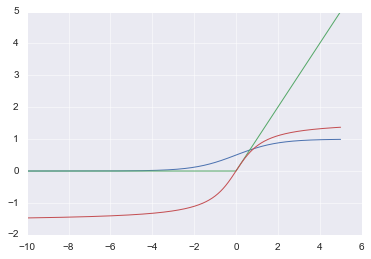

In [316]:
## Solutions
sns.set_style("darkgrid")

fig = plt.figure()
ax = plt.axes()

x = np.linspace(-10,5,1000)
y = [[f(x) for x in x] for f in (sigmoid, ReLU, arctan)]

for activation in y:
    ax.plot(x, activation)

(-10.0, 10.0, -3.0, 3.0)

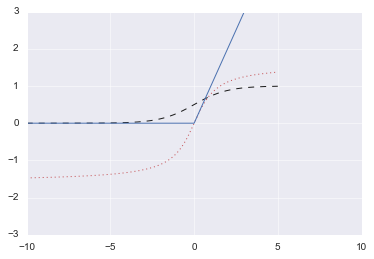

In [317]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y[0], "--k", label="sigmoid(x)")
ax.plot(x, y[2], ":r", label="tanh(x)")
ax.plot(x, y[1], "-b", label="ReLU(x)")
ax.axis([-10,10, -3,3])

### Exercises

- Finally, let's label the plot. Give it a reasonable title, label the axes and the functions.

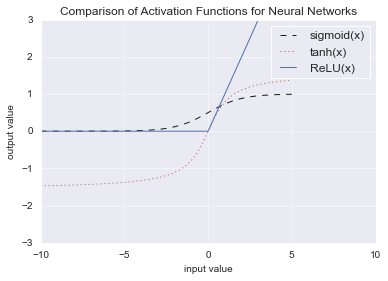

In [318]:
## Solutions
ax.set_title("Comparison of Activation Functions for Neural Networks")
ax.set_xlabel("input value")
ax.set_ylabel("output value")
ax.legend()
fig

## Simple Scatter Plots

You have the following DataFrame about people and their ages and incomes:


In [319]:
ages = np.random.randint(18, 99, 200)
people = DataFrame({'age': ages, 'income': ages*abs(np.random.randn(200)*30000+50000)})
people.tail()

age        income
195   85  3.111327e+06
196   90  5.140772e+06
197   30  2.237371e+06
198   83  7.943998e+06
199   63  4.972862e+06

### Exercises

- create a scatter plot to check if there is a correlation between age and income in this data. Don't forget to label the axes properly and give the plot a title. Use the "plt" style this time.

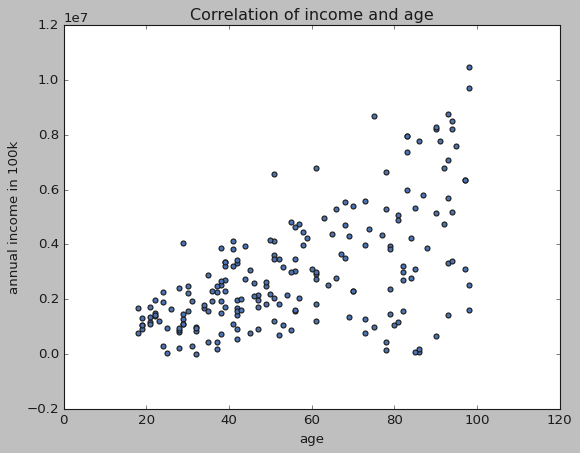

In [320]:
## Solutions
plt.style.use("classic")
plt.scatter(people["age"], people["income"])
plt.title("Correlation of income and age")
plt.xlabel("age")
plt.ylabel("annual income in 100k")
plt.show()

## Visualizing Errors

### Exercises

- What is the plt command to visualize errors?


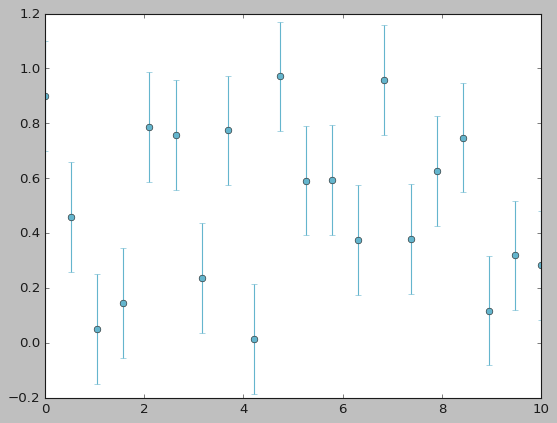

In [321]:
## Solutions
x = np.linspace(0,10,20)
y = np.random.random(20)
plt.errorbar(x, y, yerr=0.2, fmt="oc")
plt.show()

## Histograms, Binnings, and Density

### Exercises

- Plot two histograms showing the age and income distributions of the dataset from above.
- Plot a two-dimensional histogram of this data. As always, add sensible titles, labels, etc. to the plot.


(array([32., 55., 38., 28., 17.,  9.,  7.,  9.,  3.,  2.]),
 array([7.41962118e+02, 1.04681405e+06, 2.09288613e+06, 3.13895821e+06,
        4.18503030e+06, 5.23110238e+06, 6.27717446e+06, 7.32324655e+06,
        8.36931863e+06, 9.41539071e+06, 1.04614628e+07]),
 <BarContainer object of 10 artists>)

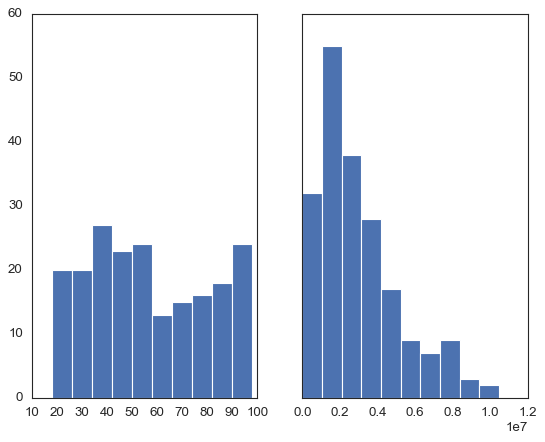

In [322]:
## Solutions
sns.set_style("white")

fig, ax = plt.subplots(1,2, sharey=True)
ax[0].hist(people["age"])
ax[1].hist(people["income"])

Text(0, 0.5, 'annual income in 100k')

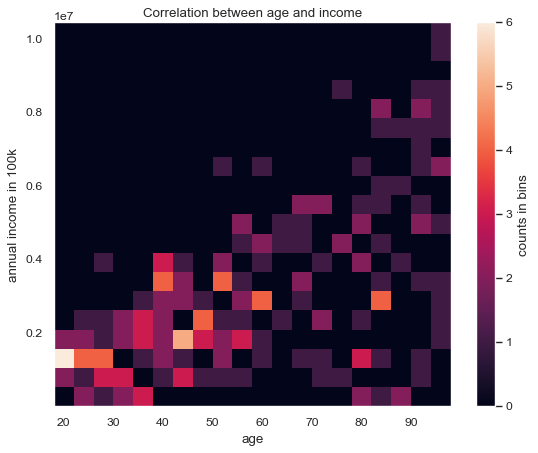

In [327]:
plt.hist2d(people["age"], people["income"], bins=20)
cb = plt.colorbar()
cb.set_label("counts in bins")
plt.title("Correlation between age and income")
plt.xlabel("age")
plt.ylabel("annual income in 100k")

## Customizing Plot Legends and Customizing Colorbars.

Skim through the material in these sections. No exercises.

## Multiple Subplots

Quite often, it is very useful to show multiple subplots next to each other.

### Exercises

- Revisit the two histograms showing age and income you created above. Now plot them next to each other using the **subplots** command.


In [324]:
## Solutions
"lol"

'lol'

## Customizing Ticks and Customizing Matplotlib: Configurations and Stylesheets

Skim through the material in these sections. No exercises.

## Visualization with Seaborn


### Exercises

Two of the most useful plots Seaborn provides are the joint and pair plots. Let's look at the following revenue data for three countries.

In [325]:
rev = DataFrame({'Germany': np.random.randint(100, 100000, 12), 
                 'Austria': np.random.randint(100, 100000, 12),
                 'France': np.random.randint(100, 100000, 12)},
                index=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dez'])
rev

Germany  Austria  France
Jan    61511    89168   84019
Feb    35276    13626   99630
Mar    49603    56351   96408
Apr    66455    92372   75583
May    99011    25949   31792
Jun    42426    58913   20683
Jul    60219    69630   31152
Aug    88256    71805   30375
Sep    83771    58799   38721
Oct    79199    25839   85864
Nov    28154    54540   31631
Dez    21718     5159   93255

- Call the `set_theme()` method of seaborn (have a look at the seaborn documentation to find out about the difference between this and the `set()` method mentioned in the textbook)
- Create a **jointplot** to look at the Germany-Austria revenue.
- Create a **pairplot** to look at all country combinations.

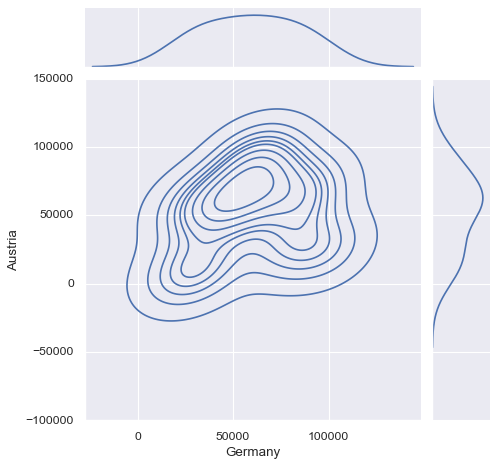

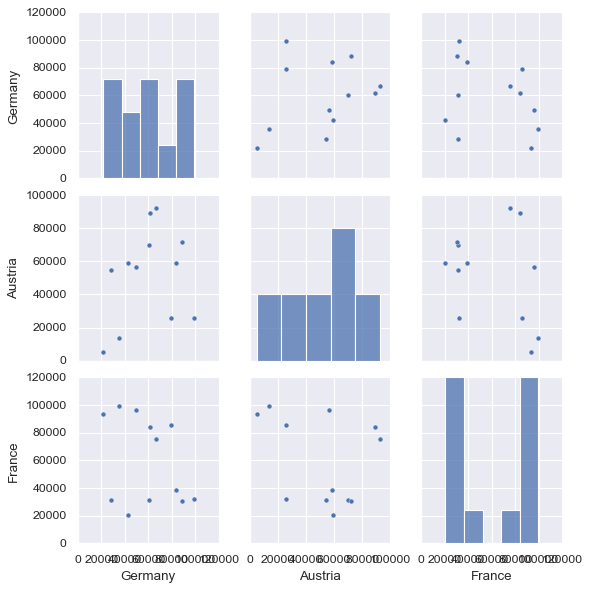

In [326]:
## Solutions
sns.set_theme()
sns.jointplot(x=rev["Germany"], y=rev["Austria"], data=rev, kind="kde")
sns.pairplot(rev)

---